<a href="https://colab.research.google.com/github/khalid-data-aspirant42/celestial_body_classification/blob/main/solar_system_object_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Creating dataset
def generate_dummy_data(num_asteroids, num_comets, ast_min, ast_max):
    # Generate dummy data for asteroids
    asteroid_names = ['Asteroid{}'.format(i) for i in range(1, num_asteroids + 1)]
    asteroids = pd.DataFrame({
        'Name': np.random.choice(asteroid_names, size=num_asteroids, replace=False),
        'Diameter (km)': np.random.uniform(ast_dia_min, ast_dia_max, size=num_asteroids),
        'Period of Revolution (years)': np.random.uniform(ast_min, ast_max, size=num_asteroids),
        'Mass (MTonne)': np.random.uniform(ast_mass_min, ast_mass_max, size=num_asteroids),
        'Max Distance from Sun (AU)': np.random.uniform(max_range_min, max_range_max, size=num_asteroids),
        'Min Distance from Sun (AU)': np.random.uniform(min_range_min, min_range_max, size=num_asteroids),
        'Type': ['Asteroid'] * num_asteroids
    })

    # Generate dummy data for comets
    comet_names = ['Comet{}'.format(i) for i in range(1, num_comets + 1)]
    comets = pd.DataFrame({
        'Name': np.random.choice(comet_names, size=num_comets, replace=False),
        'Diameter (km)': np.random.uniform(com_dia_min, com_dia_max, size=num_comets),
        'Period of Revolution (years)': np.random.uniform(com_range_min, com_range_max, size=num_comets),
        'Mass (MTonne)': np.random.uniform(com_mass_min, com_mass_max, size=num_comets),
        'Max Distance from Sun (AU)': np.random.uniform(max_range_min, max_range_max, size=num_comets),
        'Min Distance from Sun (AU)': np.random.uniform(min_range_min, min_range_max, size=num_comets),
        'Type': ['Comet'] * num_comets
    })

    planets = pd.DataFrame({
    'Name': ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune'],
    'Diameter (km)': [4879, 12104, 12756, 6792, 139820, 116460, 50724, 49244],
    'Period of Revolution (years)': [0.24, 0.62, 1, 1.88, 11.86, 29.46, 84.01, 164.8],
    'Mass (MTonne)': [3.30e14, 4.87e15, 5.97e15, 6.42e14, 1.90e18, 5.68e17, 8.68e16, 1.02e17],
    'Max Distance from Sun (AU)': [0.47, 0.73, 1.02, 1.67, 5.46, 10.12, 20.08, 30.07],
    'Min Distance from Sun (AU)': [0.31, 0.71, 0.98, 1.38, 4.95, 9.01, 18.33, 29.81],
    'Type': ['Planet', 'Planet', 'Planet', 'Planet', 'Planet', 'Planet', 'Planet', 'Planet']})

    # Concatenate the dataframes into a single dataset
    df = pd.concat([asteroids, comets, planets])

    # Reset the index of the final dataset
    df.reset_index(drop=True, inplace=True)

    return df

# generate object names
import random

names_asteroid = ['Apollos', 'Amors', 'Atens', 'Hungarias', 'Mars Crossers']
names_comet = ['Halley', 'Hale-Bopp', 'Encke', 'McNaught', 'Ikeya-Zhang']

def generate_object_names(num_names, object_list):
    names = []
    for _ in range(num_names):
        name = ''
        # Generate a random number of name components (2-4) for each name
        num_components = random.randint(2, 4)

        for _ in range(num_components):
            # Generate a random name component (e.g., first name, middle name, last name)
            name_component = random.choice(object_list)
            name += name_component + ' '

        names.append(name.strip())

    return names

# Example usage
num_asteroids, num_comets = 100, 150
com_range_min, com_range_max = 3.3, 330
com_dia_min, com_dia_max = 5, 70
com_mass_min, com_mass_max = 1e04, 5e05
ast_mass_min, ast_mass_max = 1e02, 7e08
max_range_min, max_range_max = 400, 960
min_range_min, min_range_max = 0.35 , 100
ast_min, ast_max = 3, 6
ast_dia_min, ast_dia_max = 0.1, 530

asteroid_names = generate_object_names(num_asteroids , names_asteroid)
comet_names = generate_object_names(num_comets , names_comet)

df = generate_dummy_data(num_asteroids, num_comets, ast_min, ast_max)

# Replace the generic names with actual names
df.loc[df['Type'] == 'Asteroid', 'Name'] = np.random.choice(asteroid_names, size=num_asteroids, replace=False)
df.loc[df['Type'] == 'Comet', 'Name'] = np.random.choice(comet_names, size=num_comets, replace=False)


In [ ]:
# Display the dummy dataset
df

,Name,Diameter (km),Period of Revolution (years),Mass (MTonne),Max Distance from Sun (AU),Min Distance from Sun (AU),Type
0,Atens Atens Hungarias Mars Crossers,467.204330,4.053763,6.091450e+08,617.359852,23.859493,Asteroid
1,Amors Apollos,459.081224,4.847839,1.668473e+08,895.486990,46.472768,Asteroid
2,Apollos Atens Hungarias,248.695664,3.606489,4.766725e+08,833.575767,20.435832,Asteroid
3,Hungarias Atens Apollos Apollos,61.251526,5.139134,5.841601e+08,504.949583,93.078369,Asteroid
4,Hungarias Mars Crossers Apollos Mars Crossers,228.671718,5.925332,1.764551e+07,711.067204,78.223920,Asteroid
...,...,...,...,...,...,...,...
253,Mars,6792.000000,1.880000,6.420000e+14,1.670000,1.380000,Planet
254,Jupiter,139820.000000,11.860000,1.900000e+18,5.460000,4.950000,Planet
255,Saturn,116460.000000,29.460000,5.680000e+17,10.120000,9.010000,Planet
256,Uranus,50724.000000,84.010000,8.680000e+16,20.080000,18.330000,Planet


In [ ]:
# Data Exploration
df.head()  # Display the first few rows

,Name,Diameter (km),Period of Revolution (years),Mass (MTonne),Max Distance from Sun (AU),Min Distance from Sun (AU),Type
0,Atens Atens Hungarias Mars Crossers,467.204330,4.053763,6.091450e+08,617.359852,23.859493,Asteroid
1,Amors Apollos,459.081224,4.847839,1.668473e+08,895.486990,46.472768,Asteroid
2,Apollos Atens Hungarias,248.695664,3.606489,4.766725e+08,833.575767,20.435832,Asteroid
3,Hungarias Atens Apollos Apollos,61.251526,5.139134,5.841601e+08,504.949583,93.078369,Asteroid
4,Hungarias Mars Crossers Apollos Mars Crossers,228.671718,5.925332,1.764551e+07,711.067204,78.223920,Asteroid


In [ ]:
df.info()  # Summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          258 non-null    object 
 1   Diameter (km)                 258 non-null    float64
 2   Period of Revolution (years)  258 non-null    float64
 3   Mass (MTonne)                 258 non-null    float64
 4   Max Distance from Sun (AU)    258 non-null    float64
 5   Min Distance from Sun (AU)    258 non-null    float64
 6   Type                          258 non-null    object 
dtypes: float64(5), object(2)
memory usage: 14.2+ KB


In [ ]:
df.describe()  # Statistical summary of the numeric columns

,Diameter (km),Period of Revolution (years),Mass (MTonne),Max Distance from Sun (AU),Min Distance from Sun (AU)
count,258.000000,258.000000,2.580000e+02,258.000000,258.000000
mean,1652.567651,104.424460,1.034346e+16,643.445062,49.180746
std,12127.001123,108.059778,1.235503e+17,192.536762,29.482503
min,4.835660,0.240000,1.410816e+04,0.470000,0.310000
25%,30.591280,4.848072,2.273623e+05,516.992867,23.903339
50%,56.778231,71.800212,4.136616e+05,654.756671,46.283648
75%,250.471301,195.876885,2.857779e+08,794.088504,75.520999
max,139820.000000,327.952964,1.900000e+18,958.886590,99.809053


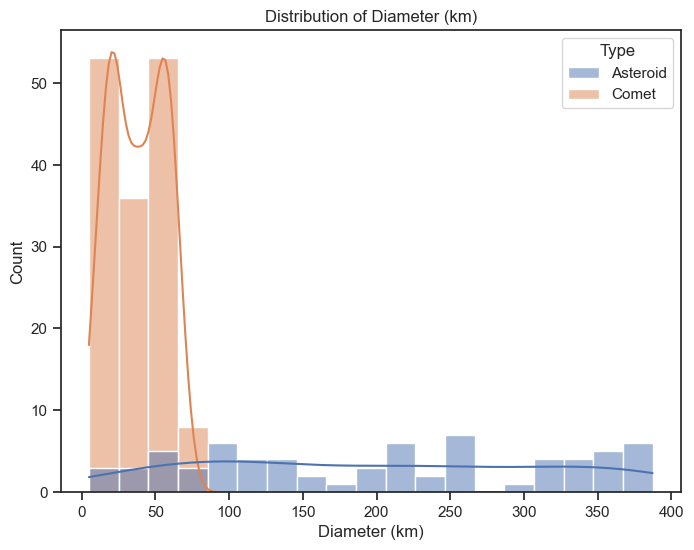

In [ ]:
# Data Visualization
sns.set(style="ticks")

# Histogram of Diameter (km)
df2 = df[df['Diameter (km)']<=df['Diameter (km)'].quantile(0.85)]
plt.figure(figsize=(8, 6))
sns.histplot(data=df2, x='Diameter (km)', hue='Type', kde=True)
plt.title('Distribution of Diameter (km)')
plt.xlabel('Diameter (km)')
plt.ylabel('Count')
plt.show()

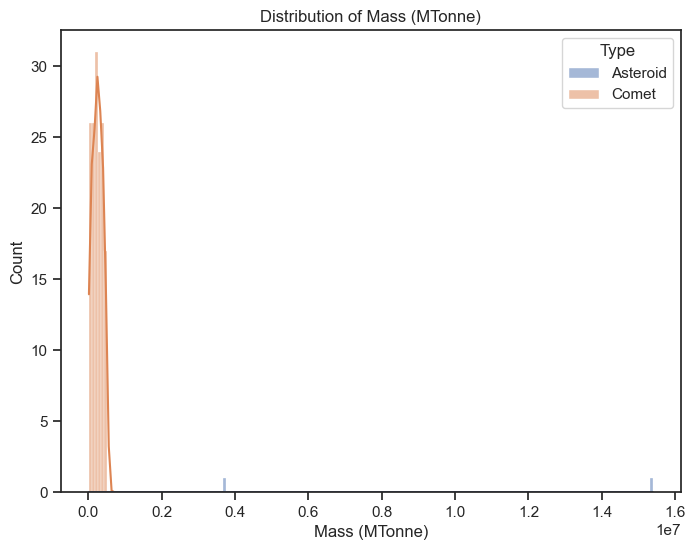

In [ ]:
# Histogram of Mass (MTonne)
df3 = df[df['Mass (MTonne)']<=df['Mass (MTonne)'].quantile(0.59)]
plt.figure(figsize=(8, 6))
sns.histplot(data=df3, x='Mass (MTonne)', hue='Type', kde=True)
plt.title('Distribution of Mass (MTonne)')
plt.xlabel('Mass (MTonne)')
plt.ylabel('Count')
plt.show()

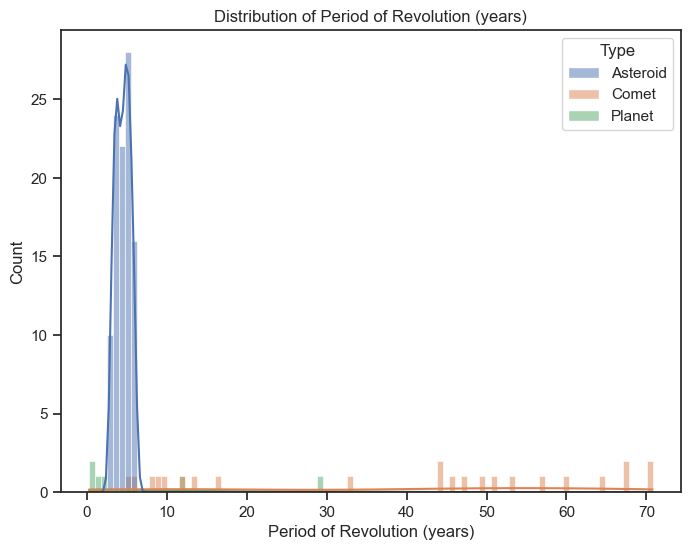

In [ ]:
# Histogram of Period of Revolution (years)
df4 = df[df['Period of Revolution (years)']<=df['Period of Revolution (years)'].quantile(0.5)]
plt.figure(figsize=(8, 6))
sns.histplot(data=df4, x='Period of Revolution (years)', hue='Type', kde=True)
plt.title('Distribution of Period of Revolution (years)')
plt.xlabel('Period of Revolution (years)')
plt.ylabel('Count')
plt.show()

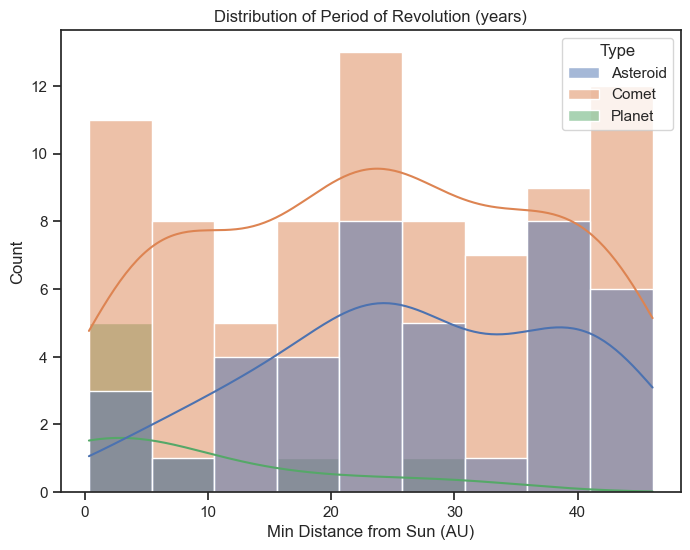

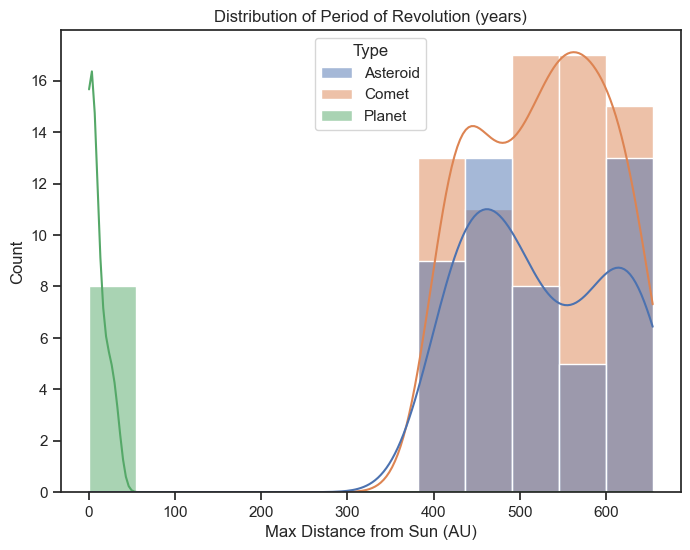

In [ ]:
# Histogram of Maximum and Minimum Distance
distance = ['Min Distance from Sun (AU)','Max Distance from Sun (AU)']
for elem in distance:
    df5 = df[df[elem]<=df[elem].quantile(0.5)]
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df5, x=elem, hue='Type', kde=True)
    plt.title('Distribution of Period of Revolution (years)')
    plt.xlabel(elem)
    plt.ylabel('Count')
    plt.show()

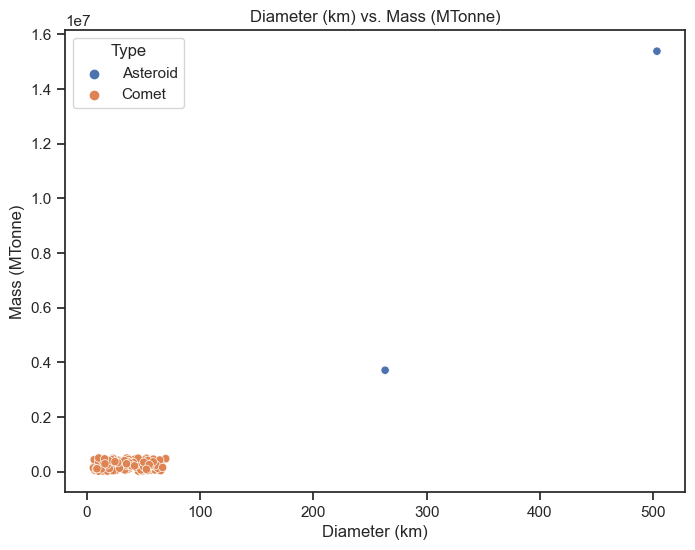

In [ ]:
# Scatter plot of Diameter (km) vs. Mass (kg)
df6 = df[df['Mass (MTonne)']<=df['Mass (MTonne)'].quantile(0.59)]
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df6, x='Diameter (km)', y='Mass (MTonne)', hue='Type')
plt.title('Diameter (km) vs. Mass (MTonne)')
plt.xlabel('Diameter (km)')
plt.ylabel('Mass (MTonne)')
plt.show()

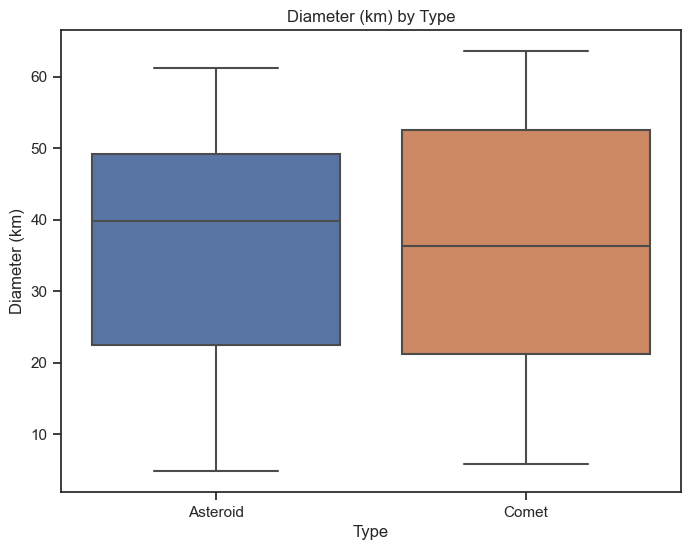

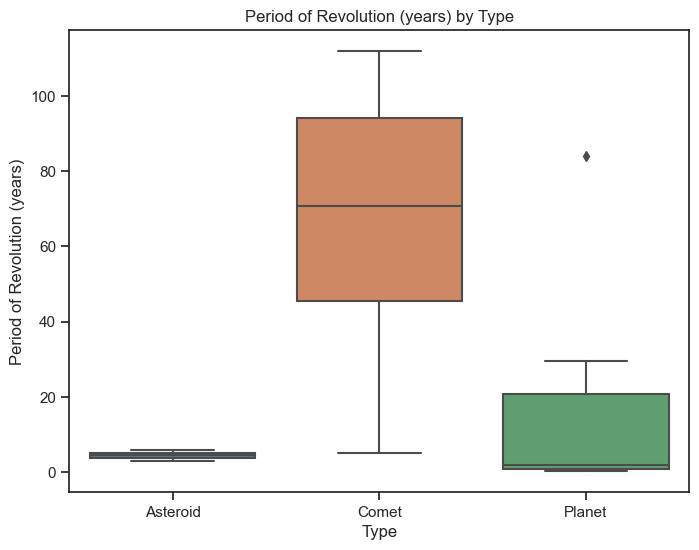

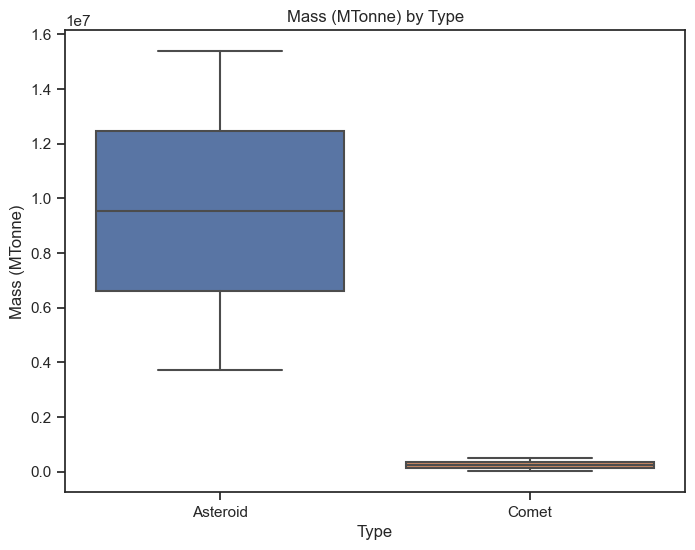

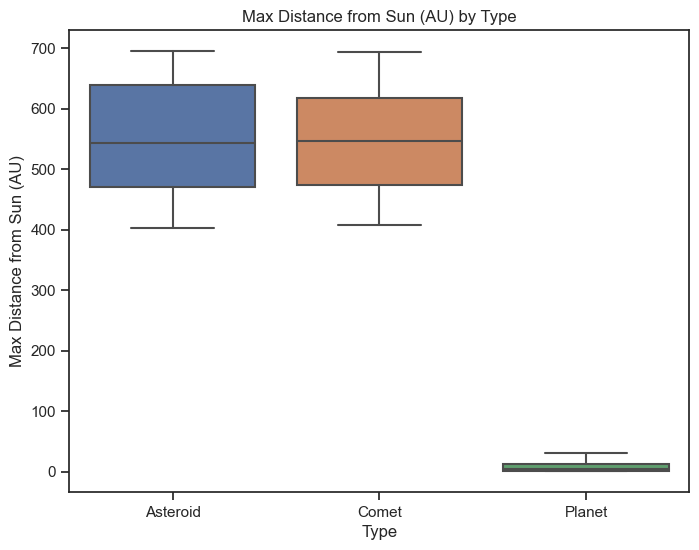

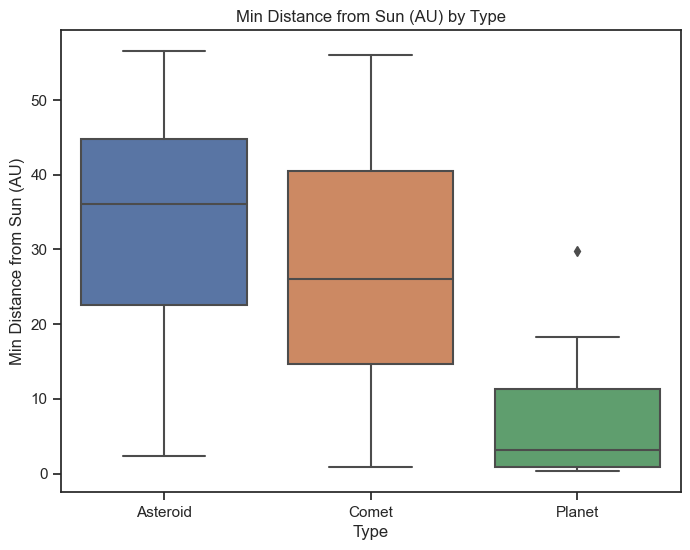

In [ ]:
# Box plot of Mass (kg) by Type
for elem in list(df.describe().columns):
    df7 = df[df[elem]<=df[elem].quantile(0.59)]
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df7, x='Type', y=elem)
    plt.title(f'{elem} by Type')
    plt.xlabel('Type')
    plt.ylabel(elem)
    plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_460\715874723.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


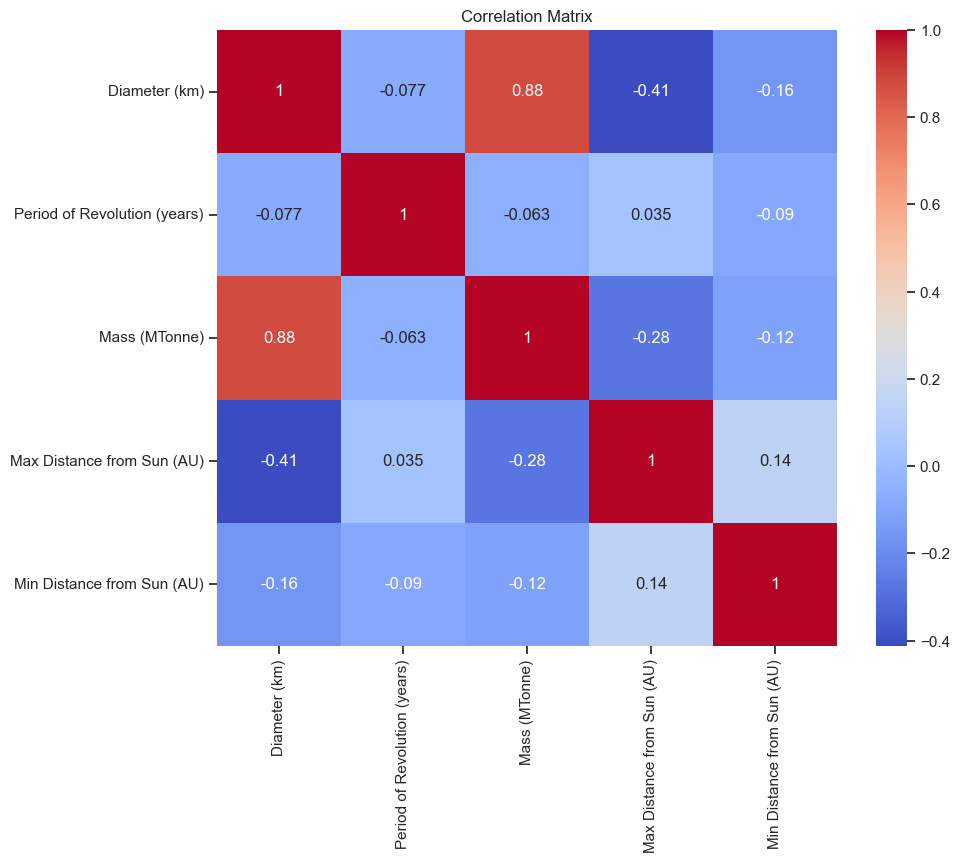

In [ ]:
# Correlation Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Grouping and Aggregation
grouped_data = df.groupby('Type').agg({'Diameter (km)': 'mean', 'Mass (MTonne)': 'mean'})
print(grouped_data)

          Diameter (km)  Mass (MTonne)
Type                                  
Asteroid      279.14273   3.548588e+08
Comet          37.79454   2.489395e+05
Planet      49097.37500   3.335765e+17


In [ ]:
# Statistical Analysis
asteroid_data = df[df['Type'] == 'Asteroid']
comet_data = df[df['Type'] == 'Comet']
planet_data = df[df['Type'] == 'Planet']

In [ ]:
# t-tests for comparing means
from scipy.stats import ttest_ind

# Compare mean diameter between asteroids and planets
t_statistic, p_value = ttest_ind(asteroid_data['Diameter (km)'], comet_data['Diameter (km)'])
print('Comparison of Asteroids and Comet - Diameter (km)')
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

Comparison of Asteroids and Comet - Diameter (km)
T-statistic: 18.783372370852074
P-value: 1.4682734617443886e-49


In [ ]:
# Compare mean mass between comets and planets
t_statistic, p_value = ttest_ind(comet_data['Mass (MTonne)'], asteroid_data['Mass (MTonne)'])
print('Comparison of Comets and Asteroid - Mass (MTonne)')
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

Comparison of Comets and Asteroid - Mass (MTonne)
T-statistic: -22.343620289191296
P-value: 2.4782076764608772e-61
